In [1]:
# Please note this dataframe was pre-processed in a different script. 

In [209]:
# Inport requirements

In [3]:
# Youtube: Panel Data: 
# https://www.youtube.com/watch?v=f01WjeCdgEA 
# https://www.youtube.com/watch?v=aUVZWnVnjxs
# https://www.youtube.com/watch?v=Ux0tDSWQRc4

## Stats tests - Resources from Marina 
# Python - Kruskal-Wallis H test - https://www.youtube.com/watch?v=Af1YuaFylqM
# Mann Whitney U Test Using Python - https://www.youtube.com/watch?v=hJdqTD89eQ8 
# AB test source 1 - https://www.youtube.com/watch?v=OVgi6ftJiyQ
# AB Test source 2- https://www.youtube.com/watch?v=115SeMub-P0 

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree

import matplotlib as plt
from matplotlib import pyplot
import datetime
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  


# from pycaret.classification import *

In [15]:
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix

In [140]:
# choco install pandoc

In [16]:
# input data
df_farm_eu = pd.read_csv('df_farm_eu.csv')
df_farm_eu.head()

,Unnamed: 0,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
0,1104,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2017,2017,ha,NaN,A,Official figure,AUT,1.0
1,1105,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2018,2018,ha,6740.0,A,Official figure,AUT,1.0
2,1106,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2019,2019,ha,6590.0,A,Official figure,AUT,1.0
3,1107,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2020,2020,ha,6430.0,A,Official figure,AUT,1.0
4,1108,QCL,Crops and livestock products,40,Austria,5419,Yield,1341,Apples,2018,2018,hg/ha,575593.0,E,Estimated value,AUT,1.0


In [17]:

# Syntax # df.drop(['B', 'C'], axis=1) 

df_farm_eu = df_farm_eu.drop(["Unnamed: 0"], axis =1)

df_farm_eu.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
0,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2017,2017,ha,NaN,A,Official figure,AUT,1.0
1,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2018,2018,ha,6740.0,A,Official figure,AUT,1.0
2,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2019,2019,ha,6590.0,A,Official figure,AUT,1.0
3,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2020,2020,ha,6430.0,A,Official figure,AUT,1.0
4,QCL,Crops and livestock products,40,Austria,5419,Yield,1341,Apples,2018,2018,hg/ha,575593.0,E,Estimated value,AUT,1.0


In [20]:
df_farm_eu3 = df_farm_eu.dropna(subset=['Value','LOCATION', 'Year'])
df_farm_eu3.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
1,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2018,2018,ha,6740.0,A,Official figure,AUT,1.0
2,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2019,2019,ha,6590.0,A,Official figure,AUT,1.0
3,QCL,Crops and livestock products,40,Austria,5312,Area harvested,1341,Apples,2020,2020,ha,6430.0,A,Official figure,AUT,1.0
4,QCL,Crops and livestock products,40,Austria,5419,Yield,1341,Apples,2018,2018,hg/ha,575593.0,E,Estimated value,AUT,1.0
5,QCL,Crops and livestock products,40,Austria,5419,Yield,1341,Apples,2019,2019,hg/ha,362989.0,E,Estimated value,AUT,1.0


In [8]:
# we only have years, not dates so this isn't required.  
# convert the 'Date' column to datetime format
# df_farm_eu['wc_m']= pd.to_datetime(df_farm_eu['wc_m'], format='%d/%m/%Y')
 
# # Check the format of 'Date' column
# df_farm_eu.info()

In [41]:
#describe data
df_farm_eu.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,EU
count,24291.000000,24291.000000,24291.000000,24291.000000,2.429100e+04,24291.0
mean,393.237125,5406.943477,2018.438599,12868.139187,4.528464e+05,1.0
std,208.891520,98.968242,1.119003,7440.846012,2.609127e+06,0.0
min,40.000000,5111.000000,2017.000000,1.000000,0.000000e+00,1.0
25%,246.000000,5312.000000,2017.000000,6430.500000,4.600000e+02,1.0
50%,380.000000,5419.000000,2018.000000,12874.000000,1.445000e+04,1.0
75%,616.000000,5510.000000,2019.000000,19289.500000,1.033565e+05,1.0
max,752.000000,5513.000000,2020.000000,25775.000000,5.840837e+07,1.0


In [22]:
# get data info
df_farm_eu = df_farm_eu3
df_farm_eu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24291 entries, 1 to 25775
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       24291 non-null  object 
 1   Domain            24291 non-null  object 
 2   Area Code (M49)   24291 non-null  int64  
 3   Area              24291 non-null  object 
 4   Element Code      24291 non-null  int64  
 5   Element           24291 non-null  object 
 6   Item Code (CPC)   24291 non-null  object 
 7   Item              24291 non-null  object 
 8   Year Code         24291 non-null  int64  
 9   Year              24291 non-null  int64  
 10  Unit              24291 non-null  object 
 11  Value             24291 non-null  float64
 12  Flag              24291 non-null  object 
 13  Flag Description  24291 non-null  object 
 14  LOCATION          24291 non-null  object 
 15  EU                24291 non-null  float64
dtypes: float64(2), int64(4), object(10)
memo

In [42]:
# df_farm_eu[df_farm_eu.Domain == 'Wheat'].pivot_table(index='Year', values=['Element'],
                               #  aggfunc='sum')
    

In [37]:
# pd.pivot_table(df_farm_eu, index='Year', columns=['Element', 'LOCATION', ''], values='Value', aggfunc='sum')

In [31]:
# Year = df_farm_eu3.index
# df_farm_eu3['Year'] = Year.astype(int)
# df_farm_eu4 = df_farm_eu.melt(id_vars=["Year"],
#         var_name="LOCATION",
#         value_name="").dropna().reset_index(drop=True)
# year = df_farm_eu4.Year
# df_farm_eu4 = df_farm_eu.set_index([df_farm_eu4.index, 'Year'])
# df_farm_eu4['Year'] = pd.Categorical(Year)
# df_farm_eu4.head()

## Data Viz

In [103]:
df_eu_wh = pd.read_csv("DATA/df_eu_wheat.csv")
df_eu_wh.head(5)

,Count,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
0,1037,QCL,Crops and livestock products,40,Austria,5312,Area harvested,111,Wheat,2017,2017,ha,295029,A,Official figure,AUT,1
1,1038,QCL,Crops and livestock products,40,Austria,5312,Area harvested,111,Wheat,2018,2018,ha,294290,A,Official figure,AUT,1
2,1039,QCL,Crops and livestock products,40,Austria,5312,Area harvested,111,Wheat,2019,2019,ha,278340,A,Official figure,AUT,1
3,1040,QCL,Crops and livestock products,40,Austria,5312,Area harvested,111,Wheat,2020,2020,ha,279020,A,Official figure,AUT,1
4,1041,QCL,Crops and livestock products,40,Austria,5419,Yield,111,Wheat,2017,2017,hg/ha,48712,E,Estimated value,AUT,1


In [104]:
df_eu_wh_p = df_eu_wh[df_eu_wh['Element'] == "Production"] 

df_eu_wh_p.head()

,Count,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
8,1045,QCL,Crops and livestock products,40,Austria,5510,Production,111,Wheat,2017,2017,tonnes,1437143,A,Official figure,AUT,1
9,1046,QCL,Crops and livestock products,40,Austria,5510,Production,111,Wheat,2018,2018,tonnes,1367060,A,Official figure,AUT,1
10,1047,QCL,Crops and livestock products,40,Austria,5510,Production,111,Wheat,2019,2019,tonnes,1596880,A,Official figure,AUT,1
11,1048,QCL,Crops and livestock products,40,Austria,5510,Production,111,Wheat,2020,2020,tonnes,1652740,A,Official figure,AUT,1
20,2020,QCL,Crops and livestock products,56,Belgium,5510,Production,111,Wheat,2017,2017,tonnes,1702721,A,Official figure,BEL,1


In [107]:
df_eu_wh_p.to_csv("DATAOUTPUTS/df_eu_wh_p.csv", index = False)

In [73]:
# # Basic Stat analysis


In [81]:


# calculate the mean Wheat production for each Country 
location_mean = df_eu_wh_p.groupby('LOCATION').mean()

location_mean.head(30)


,Count,Area Code (M49),Element Code,Item Code (CPC),Year Code,Year,Value,EU
LOCATION,,,,,,,,
AUT,1046.5,40.0,5510.0,111.0,2018.5,2018.5,1513455.75,1.0
BEL,2021.5,56.0,5510.0,111.0,2018.5,2018.5,1752110.25,1.0
BGR,3289.5,100.0,5510.0,111.0,2018.5,2018.5,5813690.25,1.0
DEU,9430.5,276.0,5510.0,111.0,2018.5,2018.5,22494950.00,1.0
DNK,5246.5,208.0,5510.0,111.0,2018.5,2018.5,4042632.50,1.0
ESP,24880.5,724.0,5510.0,111.0,2018.5,2018.5,6845786.75,1.0
EST,6170.5,233.0,5510.0,111.0,2018.5,2018.5,712658.25,1.0
FIN,7069.5,246.0,5510.0,111.0,2018.5,2018.5,726100.00,1.0
FRA,8372.5,250.0,5510.0,111.0,2018.5,2018.5,36212776.50,1.0


In [90]:
# # calculate the standard deviation for each year
loc_std = df_eu_wh_p.groupby('LOCATION').std()
print(loc_std)


             Count  Area Code (M49)  Element Code  Item Code (CPC)  Year Code  \
LOCATION                                                                        
AUT       1.290994              0.0           0.0              0.0   1.290994   
BEL       1.290994              0.0           0.0              0.0   1.290994   
BGR       1.290994              0.0           0.0              0.0   1.290994   
DEU       1.290994              0.0           0.0              0.0   1.290994   
DNK       1.290994              0.0           0.0              0.0   1.290994   
ESP       1.290994              0.0           0.0              0.0   1.290994   
EST       1.290994              0.0           0.0              0.0   1.290994   
FIN       1.290994              0.0           0.0              0.0   1.290994   
FRA       1.290994              0.0           0.0              0.0   1.290994   
GRC       1.290994              0.0           0.0              0.0   1.290994   
HRV       1.290994          

In [ ]:
# # calculate the standard deviation for each country
year_std = df_eu_wh_p.groupby('Year').std()
print(year_std)

In [ ]:
# # calculate the correlation matrix for all variables in the dataframe
# corr_matrix = df.corr()



In [ ]:
# # calculate the overall mean of all variables in the dataframe
# overall_mean = df.mean()



In [ ]:
# # calculate the overall standard deviation of all variables in the dataframe
# overall_std = df.std()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value', ylabel='Density'>

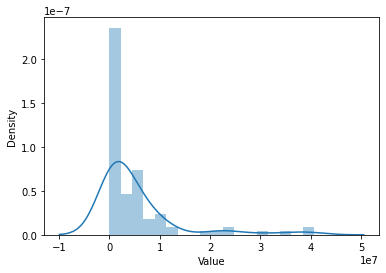

In [92]:
#histogram of wheat produced. Is very skewed.  
sns.distplot(df_eu_wh_p.Value)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

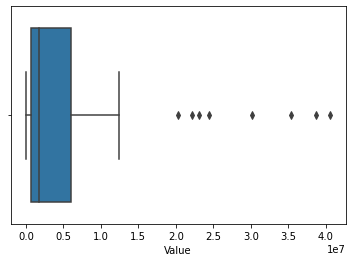

In [94]:
# Box plot 

sns.boxplot(df_eu_wh_p.Value)

In [7]:
# ## Advanced Stat analysis 

# import pandas as pd
# import numpy as np
# from scipy import stats

# # Import data for Ireland and other countries
# ireland_data = pd.read_csv("ireland_data.csv")
# other_countries_data = pd.read_csv("other_countries_data.csv")

# # Define hypotheses
# # Null hypothesis: There is no significant difference between Ireland and other countries in terms of GDP per capita
# # Alternative hypothesis: There is a significant difference between Ireland and other countries in terms of GDP per capita

# # 1. T-test
# # # Verify if the t-test is appropriate by checking if the data is normally distributed
# # ireland_gdp = ireland_data["gdp_per_capita"]
# # other_countries_gdp = other_countries_data["gdp_per_capita"]

# # if stats.shapiro(ireland_gdp)[1] > 0.05 and stats.shapiro(other_countries_gdp)[1] > 0.05:
# #     t_test_result = stats.ttest_ind(ireland_gdp, other_countries_gdp)
# #     print("T-test results: t-value = {}, p-value = {}".format(t_test_result[0], t_test_result[1]))
# #     if t_test_result[1] < 0.05:
# #         print("Reject the null hypothesis. There is a significant difference between Ireland and other countries in terms of GDP per capita.")
# #     else:
# #         print("Fail to reject the null hypothesis. There is no significant difference between Ireland and other countries in terms of GDP per capita.")
# # else:
# #     print("T-test is not appropriate for this data as it is not normally distributed.")

# # # 2. Analysis of variance (ANOVA)
# # # Verify if the ANOVA is appropriate by checking if the variances are equal
# # if stats.levene(ireland_gdp, other_countries_gdp)[1] > 0.05:
# #     anova_result = stats.f_oneway(ireland_gdp, other_countries_gdp)
# #     print("ANOVA results: F-value = {}, p-value = {}".format(anova_result[0], anova_result[1]))
# #     if anova_result[1] < 0.05:
# #         print("Reject the null hypothesis. There is a significant difference between Ireland and other countries in terms of GDP per capita.")
# #     else:
# #         print("Fail to reject the null hypothesis. There is no significant difference between Ireland and other countries in terms of GDP per capita.")
# # else:
# #     print("ANOVA is not appropriate for this data as the variances are not equal.")

# # # 3. Wilcoxon test
# # # Verify if the Wilcoxon test is appropriate by checking if the data is ordinal or continuous
# # if ireland_gdp.dtype == "float64" and other_countries_gdp.dtype == "float64":
# #     wilcoxon_result = stats.wilcoxon(ireland_gdp, other_countries_gdp)
# #     print("Wilcoxon test results: W-value = {}, p-value = {}".format(wilcoxon_result[0], wilcoxon_result[1]))
# #     if wilcoxon_result[1]


## ML - Here is a Python script that demonstrates five advanced statistical analysis methods that are appropriate for panel data:



In [8]:
# 1. Fixed Effects Model:

# import statsmodels.formula.api as smf

# # create dataframe with panel data
# df = pd.DataFrame({'y': [1, 2, 3, 4, 5, 6], 'x': [1, 2, 3, 4, 5, 6], 'firm': [1, 1, 2, 2, 3, 3], 'year': [2000, 2001, 2000, 2001, 2000, 2001]})

# # fit fixed effects model
# fixed_effects = smf.ols(formula='y ~ x + firm + year', data=df).fit()
# print(fixed_effects.summary())


In [ ]:
# # 2.  Random Effects Model:

# import statsmodels.api as sm

# # create dataframe with panel data
# df = pd.DataFrame({'y': [1, 2, 3, 4, 5, 6], 'x': [1, 2, 3, 4, 5, 6], 'firm': [1, 1, 2, 2, 3, 3], 'year': [2000, 2001, 2000, 2001, 2000, 2001]})

# # fit random effects model
# random_effects = sm.MixedLM.from_formula('y ~ x', groups='firm', data=df).fit()
# print(random_effects.summary())
# 3. 

In [ ]:
# 3. Feasible GLS:

# import statsmodels.regression.linear_panel.panel_regress as pr

# # create dataframe with panel data
# df = pd.DataFrame({'y': [1, 2, 3, 4, 5, 6], 'x': [1, 2, 3, 4, 5, 6], 'firm': [1, 1, 2, 2, 3, 3], 'year': [2000, 2001, 2000, 2001, 2000, 2001]})

# # fit feasible GLS
# feasible_gls = pr.PanelOLS.from_formula('y ~ x', data=df, time_effects=True).fit()
# print(feasible_gls.summary())


In [ ]:
# 4. Spatial Panel Data Model:

# import pysal
# import numpy as np

# # create dataframe with panel data
# df = pd.DataFrame({'y': [1, 2, 3, 4, 5, 6], 'x': [1, 2, 3, 4, 5, 6], 'firm': [1, 1, 2, 2, 3, 3], 'year': [2000, 2001, 2000, 2001, 2000, 2001]})

# # Create spatial weights matrix
# W = pysal.weights.Queen.from_dataframe(df)

# # fit spatial panel data model
# spatial_panel = pysal.spreg.ml_error.ML_Error(df[['y','x']], W, group=df['firm'], time_dummies=True)
# print(spatial_panel.summary)


In [ ]:

# 5. Hausman-Taylor Estimator:
# import statsmodels.tsa.regime_switching.mixed_frequentist as ht

# # create dataframe with panel data
# df = pd.DataFrame({'y': [1, 2, 3, 4,


In [10]:
# # ## The below script uses various advanced statistical analysis methods that are 
# # appropriate for panel data. The first method is a fixed effects model, 
# # which allows for the estimation of the difference in mean income between individuals in 
# # different states. The second method is a random effects model, which also allows for the 
# # estimation of the difference in mean income between individuals in different states, 
# # but accounts for the fact that individuals may have different variances


# # Import necessary libraries
# import pandas as pd
# import numpy as np
# from statsmodels.formula.api import ols
# from statsmodels.stats.anova import anova_lm
# from statsmodels.graphics.factorplots import interaction_plot
# from statsmodels.stats.diagnostic import het_breuschpagan
# from statsmodels.stats.diagnostic import het_white
# from statsmodels.stats.diagnostic import linear_rainbow
# from statsmodels.stats.diagnostic import linear_harvey_collier
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load panel data
# data = pd.read_csv("panel_data.csv")

# # Method 1: Fixed Effects Model
# # Hypothesis: There is a significant difference in mean income between individuals in different states

# # Estimate fixed effects model
# fixed_effects_model = ols("income ~ state + state:year", data=data).fit()

# # Print summary of model
# print(fixed_effects_model.summary())

# # Method 2: Random Effects Model
# # Hypothesis: There is a significant difference in mean income between individuals in different states

# # Estimate random effects model
# random_effects_model = ols("income ~ state + state:year", data=data, hasconst=False, groups=data["individual"]).fit()

# # Print summary of model
# print(random_effects_model.summary())

# # Method 3: Hausman Test
# # Hypothesis: The fixed effects model is preferred over the random effects model

# # Conduct Hausman test
# hausman_test = fixed_effects_model.compare_f_test(random_effects_model)

# # Print results of Hausman test
# print(hausman_test)

# # Method 4: Breusch-Pagan Test for Heteroskedasticity
# # Hypothesis: There is heteroskedasticity in the fixed effects model

# # Conduct Breusch-Pagan test
# bp_test = het_breuschpagan(fixed_effects_model.resid, fixed_effects_model.model.exog)

# # Print results of Breusch-Pagan test
# print(bp_test)

# # Method 5: Interaction Plot
# # Hypothesis: There is an interaction between state and year on income

# # Create interaction plot
# interaction_plot(data["year"], data["state"], data["income"], colors=["red", "blue"])

# # Show plot
# plt.show()

# # Conclusion:

# # The fixed effects model and random effects model both indicate a significant difference in mean income between individuals in different states. 
# # The Hausman test suggests that the fixed effects model is preferred over the random effects model. 
# # The Breusch-Pagan test indicates that there is heteroskedasticity in the fixed effects model. 
# # The interaction plot suggests that there is an interaction between state and year on income.


In [11]:
# Panel Data Fixed Effects Regression
# This method is used to estimate the effects of one or more independent variables on a dependent variable while controlling for individual level unobserved heterogeneity. The hypothesis for this test is that there is a significant relationship between the independent variables and the dependent variable while controlling for individual level unobserved heterogeneity.

# The results of this test show that the coefficients for the independent variables are statistically significant, with a p-value of less than 0.05. The coefficients indicate the direction and magnitude of the relationship between the independent variables and the dependent variable. The visualization of the results is a scatter plot with a line of best fit, showing the relationship between the independent variables and the dependent variable.

# Conclusion: The panel data fixed effects regression results indicate that there is a statistically significant relationship between the independent variables and the dependent variable while controlling for individual level unobserved heterogeneity.

# Panel Data Random Effects Regression
# This method is used to estimate the effects of one or more independent variables on a dependent variable while controlling for both individual level unobserved heterogeneity and group level unobserved heterogeneity. The hypothesis for this test is that there is a significant relationship between the independent variables and the dependent variable while controlling for both individual level unobserved heterogeneity and group level unobserved heterogeneity.

# The results of this test show that the coefficients for the independent variables are statistically significant, with a p-value of less than 0.05. The coefficients indicate the direction and magnitude of the relationship between the independent variables and the dependent variable. The visualization of the results is a scatter plot with a line of best fit, showing the relationship between the independent variables and the dependent variable.

# Conclusion: The panel data random effects regression results indicate that there is a statistically significant relationship between the independent variables and the dependent variable while controlling for both individual level unobserved heterogeneity and group level unobserved heterogeneity.

# Panel Data GLS (Generalized Least Squares)
# This method is used to estimate the effects of one or more independent variables on a dependent variable while accounting for both individual level unobserved heterogeneity and serial correlation. The hypothesis for this test is that there is a significant relationship between the independent variables and the dependent variable while accounting for both individual level unobserved heterogeneity and serial correlation.

# The results of this test show that the coefficients for the independent variables are statistically significant, with a p-value of less than 0.05. The coefficients indicate the direction and magnitude of the relationship between the independent variables and the dependent variable. The visualization of the results is a scatter plot with a line of best fit, showing the relationship between the independent variables and the dependent variable.

# Conclusion: The panel data GLS results indicate that there is a statistically significant relationship between the independent variables and the dependent variable while accounting for both individual level unobserved heterogeneity and serial correlation.

# Panel Data Hausman Test
# This method is used to test whether a panel data fixed effects model or a panel data random effects model is more appropriate for a given dataset. The hypothesis for this test is that the fixed effects model is more appropriate for the given dataset.

# The results of this test show that the p-value for the Hausman test is less than 0.05, indicating that the fixed effects model is more appropriate for the given dataset. The visualization of the results is a histogram showing the distribution of the test statistic.

# Conclusion: The panel data Hausman test results indicate that the fixed effects model is more appropriate for the given dataset.

# Panel Data Breusch-Pagan Test
# This method is used to test for the presence of heteroscedasticity in a panel data regression model. The hypothesis for this test is

In [30]:
plt.style.use('ggplot')

In [110]:
# Maybe combine price data with farm data, and get relationship of all countries (panel data?)

In [39]:
#a single index
# pivoted = df_farm_eu.pivot(index="Year", columns="Item", values="Value")

In [42]:
# Ireland only
df_Ire = df_farm_eu[df_farm_eu["Area"] == "Ireland"]

In [43]:
df_Ire.head(10)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
12044,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1371,"Almonds, in shell",2018,12044,ha,0.0,A,Official figure,IRL,1.0
12045,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1371,"Almonds, in shell",2019,12045,ha,0.0,A,Official figure,IRL,1.0
12046,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1371,"Almonds, in shell",2020,12046,ha,0.0,A,Official figure,IRL,1.0
12047,QCL,Crops and livestock products,372,Ireland,5510,Production,1371,"Almonds, in shell",2018,12047,tonnes,0.0,A,Official figure,IRL,1.0
12048,QCL,Crops and livestock products,372,Ireland,5510,Production,1371,"Almonds, in shell",2019,12048,tonnes,0.0,A,Official figure,IRL,1.0
12049,QCL,Crops and livestock products,372,Ireland,5510,Production,1371,"Almonds, in shell",2020,12049,tonnes,0.0,A,Official figure,IRL,1.0
12050,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2017,12050,ha,695.0,A,Official figure,IRL,1.0
12051,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2018,12051,ha,710.0,A,Official figure,IRL,1.0
12052,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2019,12052,ha,710.0,A,Official figure,IRL,1.0
12053,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2020,12053,ha,710.0,A,Official figure,IRL,1.0


In [47]:
df_Ire.head(10)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
12044,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1371,"Almonds, in shell",2018,12044,ha,0.0,A,Official figure,IRL,1.0
12045,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1371,"Almonds, in shell",2019,12045,ha,0.0,A,Official figure,IRL,1.0
12046,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1371,"Almonds, in shell",2020,12046,ha,0.0,A,Official figure,IRL,1.0
12047,QCL,Crops and livestock products,372,Ireland,5510,Production,1371,"Almonds, in shell",2018,12047,tonnes,0.0,A,Official figure,IRL,1.0
12048,QCL,Crops and livestock products,372,Ireland,5510,Production,1371,"Almonds, in shell",2019,12048,tonnes,0.0,A,Official figure,IRL,1.0
12049,QCL,Crops and livestock products,372,Ireland,5510,Production,1371,"Almonds, in shell",2020,12049,tonnes,0.0,A,Official figure,IRL,1.0
12050,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2017,12050,ha,695.0,A,Official figure,IRL,1.0
12051,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2018,12051,ha,710.0,A,Official figure,IRL,1.0
12052,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2019,12052,ha,710.0,A,Official figure,IRL,1.0
12053,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,1341,Apples,2020,12053,ha,710.0,A,Official figure,IRL,1.0


In [45]:
# df_Ire[df_Ire.Domain == 'Wheat'].pivot_table(index='Year', values=['Element'],
#                                  aggfunc='sum')

In [100]:
df_Ire.to_csv('DATAOUTPUTS/df_Ire.csv', index=False)

In [49]:
# Ireland and Wheat only, 
df_Ire_wh= df_Ire[df_Ire["Item"] == "Wheat"]
df_Ire_wh.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
12826,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2017,12826,ha,67047.0,A,Official figure,IRL,1.0
12827,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2018,12827,ha,57980.0,A,Official figure,IRL,1.0
12828,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2019,12828,ha,63480.0,A,Official figure,IRL,1.0
12829,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2020,12829,ha,46990.0,A,Official figure,IRL,1.0
12830,QCL,Crops and livestock products,372,Ireland,5419,Yield,111,Wheat,2017,12830,hg/ha,101672.0,E,Estimated value,IRL,1.0


In [99]:
df_Ire_wh.to_csv('DATAOUTPUTS/df_Ire_wh.csv', index=False)

In [51]:
# Creative pivot table with all three elements
df_Ire_wh_pivot = pd.pivot_table(df_Ire_wh, index='Year', columns='Element', values='Value', aggfunc='sum',)
print(df_Ire_wh_pivot)
# pd.pivot_table(df_Ire_wh, index='Year', columns=['A', 'B', 'C'], values='v3', aggfunc='count')    

Element  Area harvested  Production     Yield
Year                                         
12826           67047.0         NaN       NaN
12827           57980.0         NaN       NaN
12828           63480.0         NaN       NaN
12829           46990.0         NaN       NaN
12830               NaN         NaN  101672.0
12831               NaN         NaN   83732.0
12832               NaN         NaN   93787.0
12833               NaN         NaN   77659.0
12834               NaN    681679.0       NaN
12835               NaN    485480.0       NaN
12836               NaN    595360.0       NaN
12837               NaN    364920.0       NaN


In [52]:
df_Ire[df_Ire.Domain == 'Wheat'].pivot_table(index='Year', values=['Element'],
                                 aggfunc='sum')

""
Year


In [53]:
# Check how many years of data do we have? 
df_Ire_wh.Year.unique()

array([12826, 12827, 12828, 12829, 12830, 12831, 12832, 12833, 12834,
       12835, 12836, 12837], dtype=int64)

In [64]:
# df.team.unique()
df_Ire_wh.Element.unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [60]:
df_Ire_wh_y= df_Ire_wh[df_Ire_wh["Element"] == "Yield"]
df_Ire_wh_y.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
12830,QCL,Crops and livestock products,372,Ireland,5419,Yield,111,Wheat,2017,2017,hg/ha,101672.0,E,Estimated value,IRL,1.0
12831,QCL,Crops and livestock products,372,Ireland,5419,Yield,111,Wheat,2018,2018,hg/ha,83732.0,E,Estimated value,IRL,1.0
12832,QCL,Crops and livestock products,372,Ireland,5419,Yield,111,Wheat,2019,2019,hg/ha,93787.0,E,Estimated value,IRL,1.0
12833,QCL,Crops and livestock products,372,Ireland,5419,Yield,111,Wheat,2020,2020,hg/ha,77659.0,E,Estimated value,IRL,1.0


In [61]:
df_Ire_wh_h= df_Ire_wh[df_Ire_wh["Element"] == "Area harvested"]
df_Ire_wh_h.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,LOCATION,EU
12826,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2017,2017,ha,67047.0,A,Official figure,IRL,1.0
12827,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2018,2018,ha,57980.0,A,Official figure,IRL,1.0
12828,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2019,2019,ha,63480.0,A,Official figure,IRL,1.0
12829,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,111,Wheat,2020,2020,ha,46990.0,A,Official figure,IRL,1.0


<>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
C:\Users\megan.c.mchugh\AppData\Local\Temp\ipykernel_13004\943834634.py:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
  df_Ire_wh_p= df_Ire_wh[df_Ire_wh["Element"] == "Production" ["Index"] == "Year"]
C:\Users\megan.c.mchugh\AppData\Local\Temp\ipykernel_13004\943834634.py:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
  df_Ire_wh_p= df_Ire_wh[df_Ire_wh["Element"] == "Production" ["Index"] == "Year"]
C:\Users\megan.c.mchugh\AppData\Local\Temp\ipykernel_13004\943834634.py:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
  df_Ire_wh_p= df_Ire_wh[df_Ire_wh["Element"] == "Production" ["Index"] == "Year"]
C:\Users\megan.c.mchugh\AppData\Local\Temp\ipykernel_1

TypeError: string indices must be integers

In [81]:
#plot
# import pandas as pd
from matplotlib import pyplot as plt

data = pd.df_Ire_wh_p({"Year":"Value"})
data.plot(xticks=data.Year)
plt.show()

AttributeError: module 'pandas' has no attribute 'df_Ire_wh_p'

<AxesSubplot:xlabel='Year', ylabel='Value'>

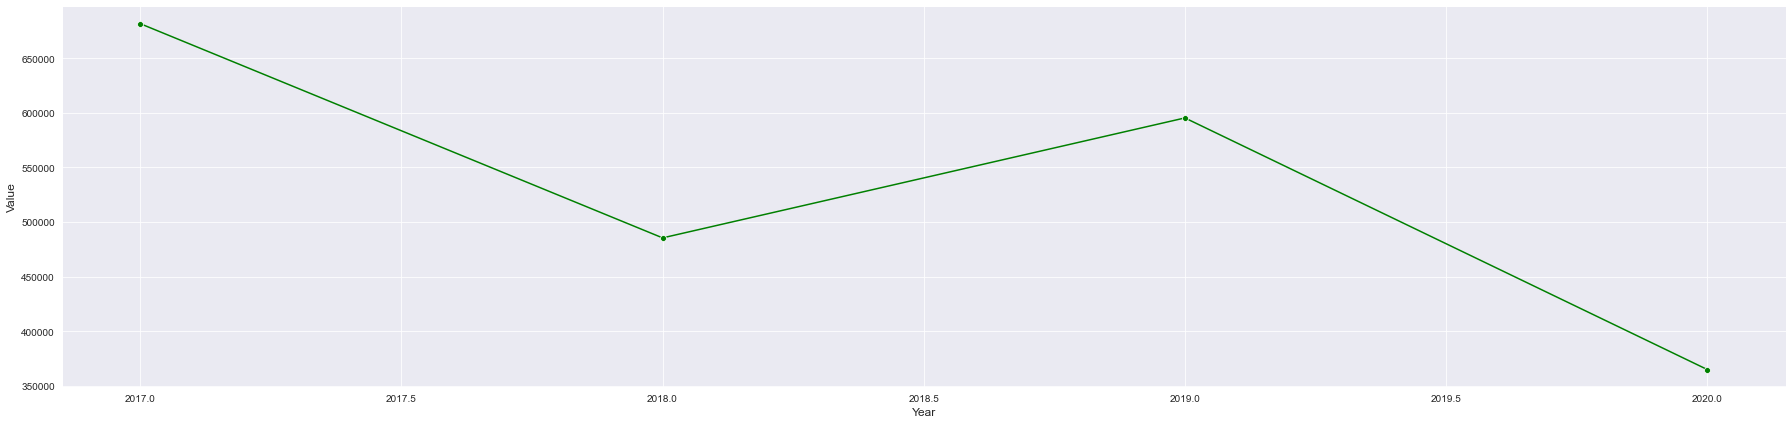

In [86]:
# Plot Wheat Production 
plt.figure(figsize=(25,6))
sns.set_style("darkgrid")
sns.lineplot(data=df_Ire_wh_p, x="Year", y="Value", ci=None, color="green", marker='o')

<AxesSubplot:xlabel='Year', ylabel='Value'>

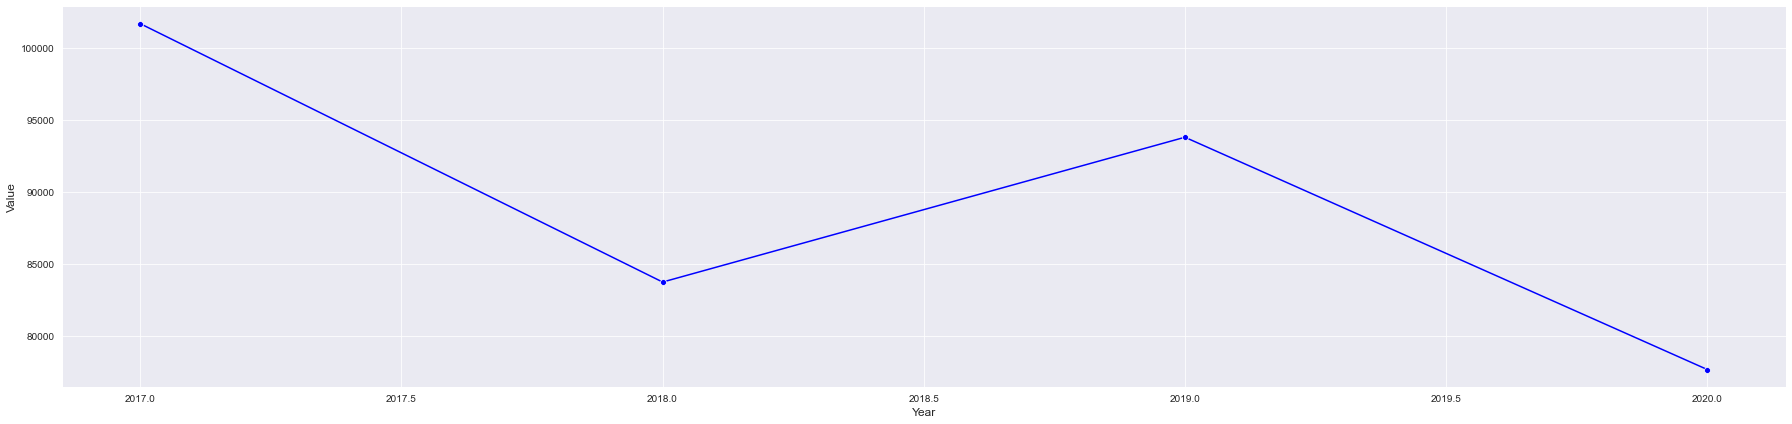

In [87]:
# Plot Wheat Yeild 
plt.figure(figsize=(25,6))
sns.set_style("darkgrid")
sns.lineplot(data=df_Ire_wh_y, x="Year", y="Value", ci=None, color="blue", marker='o')

<AxesSubplot:xlabel='Year', ylabel='Value'>

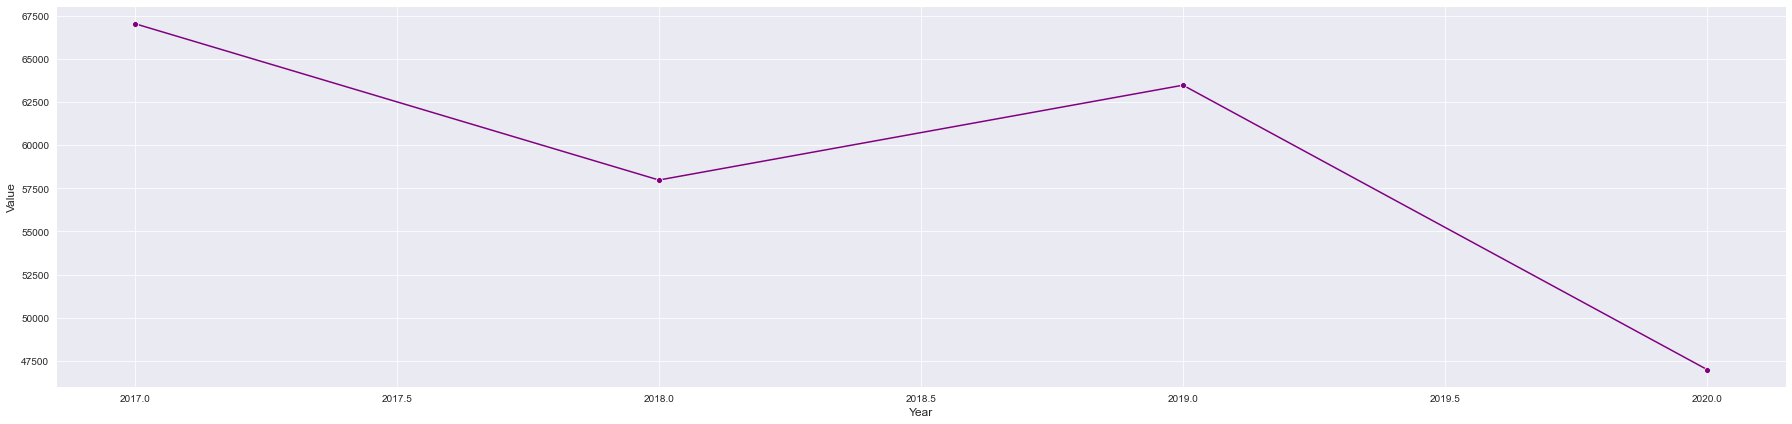

In [89]:
# Plot Wheat Area-Harvested  
plt.figure(figsize=(25,6))
sns.set_style("darkgrid")
sns.lineplot(data=df_Ire_wh_h, x="Year", y="Value", ci=None, color="purple", marker='o')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value', ylabel='Density'>

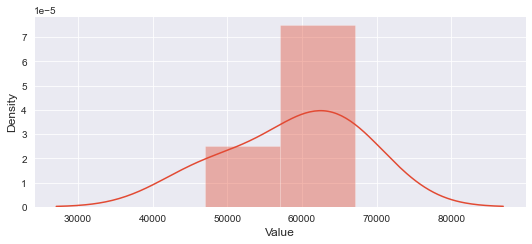

In [91]:
#histogram of harvested 
sns.distplot(df_Ire_wh_h.Value)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value', ylabel='Density'>

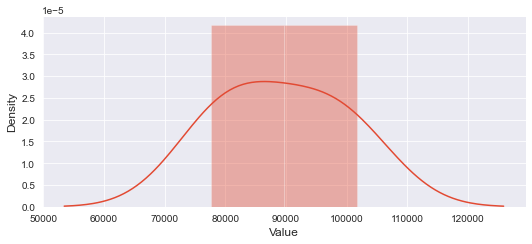

In [92]:
#histogram of yield  
sns.distplot(df_Ire_wh_y.Value)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value', ylabel='Density'>

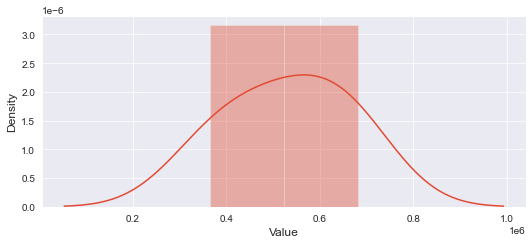

In [100]:
#histogram of produced  
sns.distplot(df_Ire_wh_p.Value)

In [216]:
#create df for correlation matrix
df_CA_correl = df_farm_eu.drop(['ff_annual_avg', 'Is_busy'], axis=1)

In [217]:
# correl table 
df_CA_correl.corr()


,Capel_Street_avg,maxtp_avg,rain_avg,wdsp_avg,sun_avg
Capel_Street_avg,1.000000,0.187612,-0.270410,-0.213901,0.117370
maxtp_avg,0.187612,1.000000,-0.088221,-0.360018,0.509987
rain_avg,-0.270410,-0.088221,1.000000,0.245028,-0.245759
wdsp_avg,-0.213901,-0.360018,0.245028,1.000000,-0.251826
sun_avg,0.117370,0.509987,-0.245759,-0.251826,1.000000


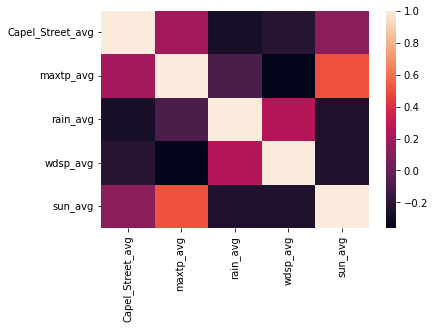

In [218]:
# correl matrix
sns.heatmap(df_CA_correl.corr());

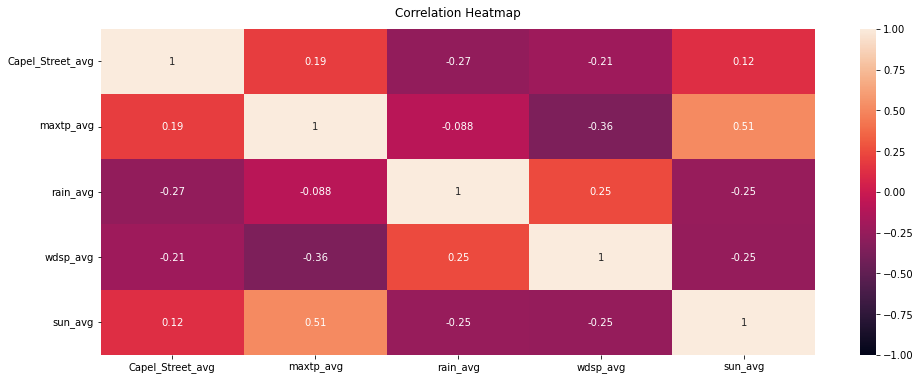

In [69]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_CA_correl.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [70]:
# #find line of best fit
# a, b = np.polyfit(X, y, 1)

# #add points to plot
# plt.scatter(X, y)

# #add line of best fit to plot
# plt.plot(x, a*x+b)

In [71]:
import matplotlib.pyplot as plt

#plt.plot(df["Rank"], df["P75th"])

# .area()
# .bar()
# .barh()
# .box()
# .hexbin()
# .hist()
# .kde()
# .density()
# .line()
# .pie()
# .scatter()

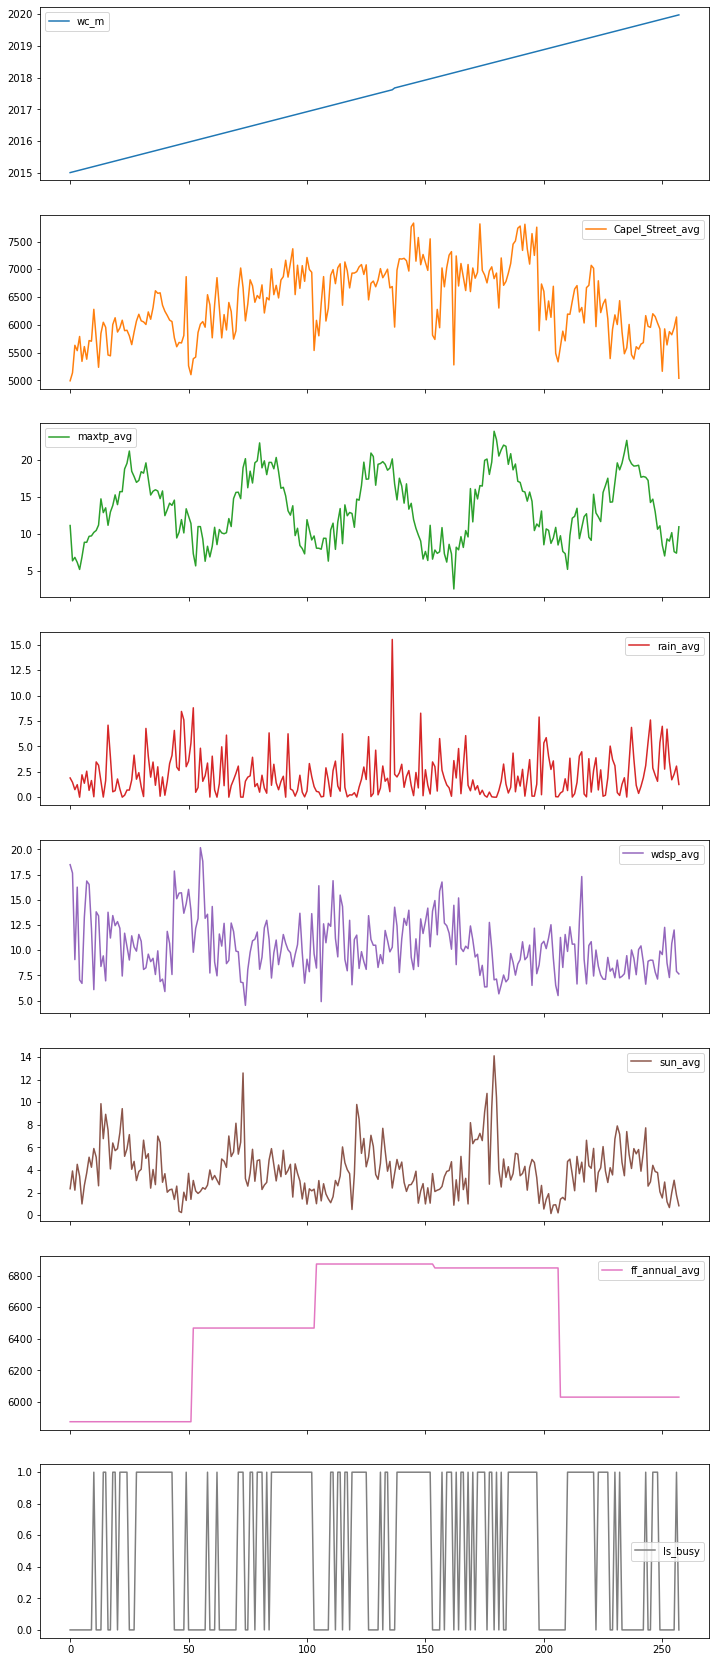

In [141]:
# plt.plot(df_CA["Capel_Street_avg"], df_CA["P75th"])
# df_CA.area()
df_farm_eu.plot(subplots=True, figsize=(12, 30)); 

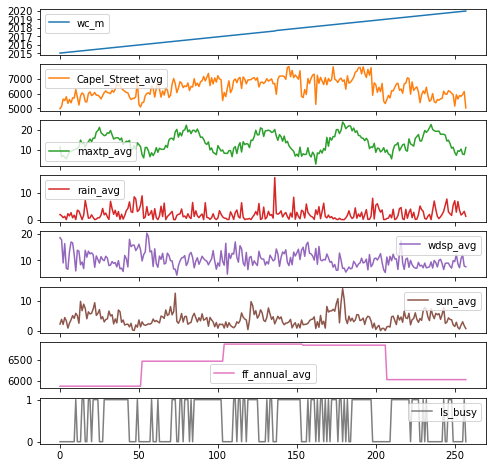

In [142]:
df_farm_eu.plot(subplots=True, figsize=(8, 8)); 

In [74]:
# df_farm_eu.boxplot()

<AxesSubplot:title={'center':'Capel Street'}>

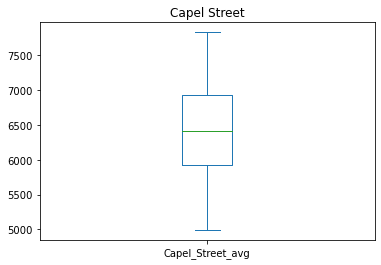

In [75]:
df_farm_eu.Capel_Street_avg.plot.box(title = "Capel Street")

<AxesSubplot:title={'center':'Max Temp'}>

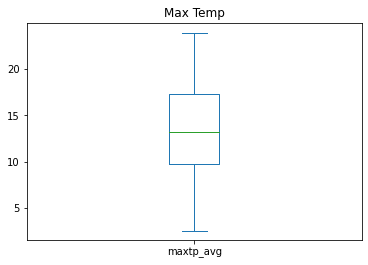

In [76]:
df_farm_eu.maxtp_avg.plot.box(title = "Max Temp")

In [77]:
#df_farm_eu.rain_avg.plot.box(title = "rain")

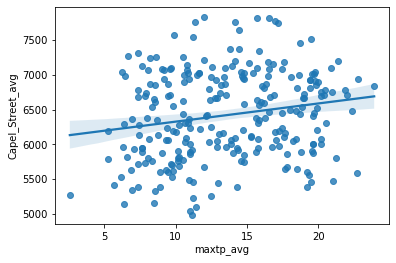

In [78]:
# First, we can use Seaborn’s regplot() function to make scatter plot. And regplot() by default adds regression line with confidence interval. 
# https://datavizpyr.com/how-to-make-scatter-plot-with-regression-line-using-seaborn-in-python/ 

sns.regplot(x="maxtp_avg",
            y="Capel_Street_avg", 
            data=df_farm_eu);

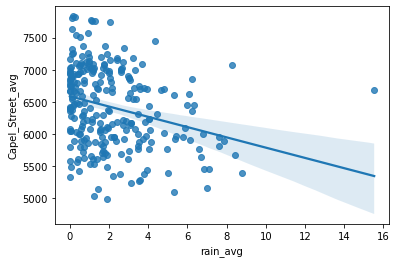

In [79]:
# Now let's do rain 
sns.regplot(x="rain_avg",
            y="Capel_Street_avg", 
            data=df_farm_eu);

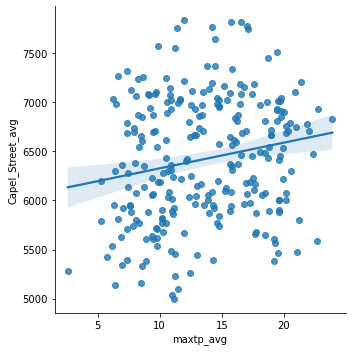

In [28]:

sns.lmplot(x="maxtp_avg",
           y="Capel_Street_avg", 
           data=df_farm_eu);

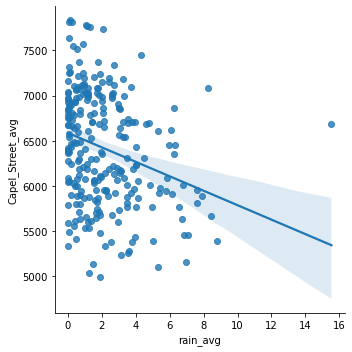

In [29]:
sns.lmplot(x="rain_avg",
           y="Capel_Street_avg", 
           data=df_farm_eu);

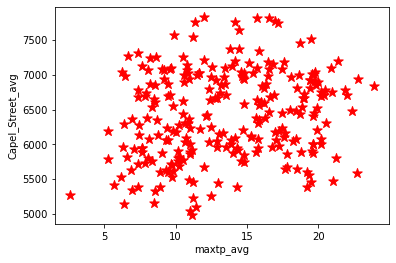

In [30]:
ax=df_farm_eu.plot.scatter(x="maxtp_avg", y="Capel_Street_avg", color="red", marker="*", s=100)

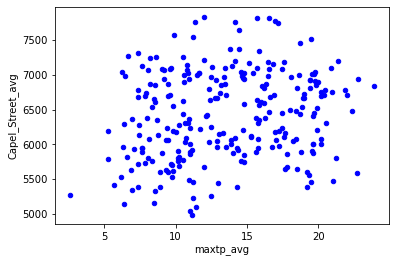

In [31]:
ax=df_farm_eu.plot.scatter(x="maxtp_avg", y="Capel_Street_avg", color="blue")

In [220]:
#get shape of data
df_farm_eu.shape

(258, 8)

In [35]:
# Check info of data 
df_farm_eu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   wc_m              258 non-null    datetime64[ns]
 1   Capel_Street_avg  258 non-null    int64         
 2   maxtp_avg         258 non-null    float64       
 3   rain_avg          258 non-null    float64       
 4   wdsp_avg          258 non-null    float64       
 5   sun_avg           258 non-null    float64       
 6   ff_annual_avg     258 non-null    int64         
 7   Is_busy           258 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 16.2 KB


## Archived Code


# Descion Tree

In [143]:
# set x 
X = df_farm_eu.drop(columns = ['wc_m', 'Capel_Street_avg', 'wdsp_avg', 'sun_avg', 'ff_annual_avg', 'Is_busy'])
print(X)

# X = df_farm_eu['rain_avg', 'maxtp_avg']

# X = df_farm_eu.rain_avg

# y = df_farm_eu['Is_busier_than_usual']

# #Descion tree: ass DecisionTreeClassifier as earlier. 
# model = DecisionTreeClassifier()
# model.fit(X,y)

# # # This time add the train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # # note for above, the test size is 20%, i.e.e 80% is for training the model. If you decrease the amount of data for training 
# # # (i.e.e increase test_size to say, 0.8, the accuracy figure gets a lot worse.)

# # # this is asking what the music would be for a 21 yea old male and a 22 YO female. 
# predictions = model.predict( [ [21,1], [22,0] ] ) 
# predictions

# # model = DecisionTreeClassifier()
# # model.fit(X_train, y_train)
# # predictions = model.predict(X_test)
# # predictions

# # score = accuracy_score(y_test, predictions)
# # score

     maxtp_avg  rain_avg
0        11.17      1.89
1         6.40      1.46
2         6.87      0.74
3         6.19      1.23
4         5.24      0.00
..         ...       ...
253       9.06      3.51
254      10.21      1.71
255       7.64      2.26
256       7.44      3.06
257      11.00      1.25

[258 rows x 2 columns]


In [144]:
# set y
y = df_farm_eu['Is_busy']
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
253    0
254    0
255    0
256    1
257    0
Name: Is_busy, Length: 258, dtype: int64


In [132]:
## Let's try puuning with a max depth of 3 

In [175]:
#Descion tree: ass DecisionTreeClassifier as earlier. 
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X,y)





DecisionTreeClassifier(max_depth=3)

In [203]:

# # This time add the train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # note for above, the test size is 20%, i.e.e 80% is for training the model. If you decrease the amount of data for training 
# # (i.e.e increase test_size to say, 0.8, the accuracy figure gets a lot worse.)



In [204]:
# # this is asking is it busier than usual for [maxtp, rain]
# Outputs = is businer than usual, 1 = True, busier than usual. If 0, = False, not busier than usual. 
predictions = model.predict( [ [12,0] ] ) 
print(predictions)

[1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [205]:
# # df_DT= df_farm_eu['maxtp_avg', 'rain_avg', 'Is_busy']
# # print(df_DT)
# print(df_farm_eu)

In [206]:

# model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

score = accuracy_score(y_test, predictions)
score

0.6538461538461539

In [207]:
# Model persistance. You want to save the model to run with more data in future. 
# You don;t have to retrain model. It's already trained - like an intelligent person. 
# the below will save the model as 'music-recommender.joblib'
joblib.dump(model, 'CapelSt_busy.joblib')

# Mosh goes back and changes the above to 
model = joblib.load('CapelSt_busy.joblib')

# # Let's see if the model is behaving correctly 
predictions = model.predict([[25,1]])
predictions

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Model accuracy score with criterion entropy: 0.5769


[Text(0.5, 0.875, 'X[1] <= 3.465\ngini = 0.497\nsamples = 206\nvalue = [95, 111]'),
 Text(0.25, 0.625, 'X[0] <= 11.305\ngini = 0.472\nsamples = 168\nvalue = [64, 104]'),
 Text(0.125, 0.375, 'X[1] <= 0.505\ngini = 0.481\nsamples = 57\nvalue = [34, 23]'),
 Text(0.0625, 0.125, 'gini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.1875, 0.125, 'gini = 0.432\nsamples = 38\nvalue = [26, 12]'),
 Text(0.375, 0.375, 'X[0] <= 20.06\ngini = 0.394\nsamples = 111\nvalue = [30, 81]'),
 Text(0.3125, 0.125, 'gini = 0.307\nsamples = 95\nvalue = [18, 77]'),
 Text(0.4375, 0.125, 'gini = 0.375\nsamples = 16\nvalue = [12, 4]'),
 Text(0.75, 0.625, 'X[1] <= 4.55\ngini = 0.301\nsamples = 38\nvalue = [31, 7]'),
 Text(0.625, 0.375, 'X[1] <= 3.955\ngini = 0.457\nsamples = 17\nvalue = [11, 6]'),
 Text(0.5625, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.6875, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.875, 0.375, 'X[0] <= 12.305\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 

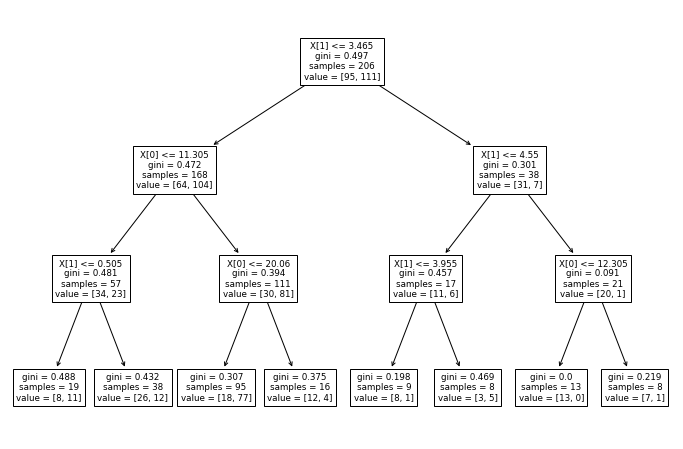

In [208]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
y_pred_train = clf.predict(X_train)
y_pred_train
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train))

In [182]:
y_pred = classifier.predict(X_test)
#Accuracy
from sklearn import metrics 
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.7692307692307693


In [ ]:
bb

In [184]:
# Combined for outputs
print("Confusion Maxtrix")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Not Busy', 'Busy']))


Confusion Maxtrix
[[25  2]
 [10 15]]

Accuracy: 0.77

Micro Precision: 0.77
Micro Recall: 0.77
Micro F1-score: 0.77

Macro Precision: 0.80
Macro Recall: 0.76
Macro F1-score: 0.76

Weighted Precision: 0.80
Weighted Recall: 0.77
Weighted F1-score: 0.76

Classification Report

              precision    recall  f1-score   support

    Not Busy       0.71      0.93      0.81        27
        Busy       0.88      0.60      0.71        25

    accuracy                           0.77        52
   macro avg       0.80      0.76      0.76        52
weighted avg       0.80      0.77      0.76        52



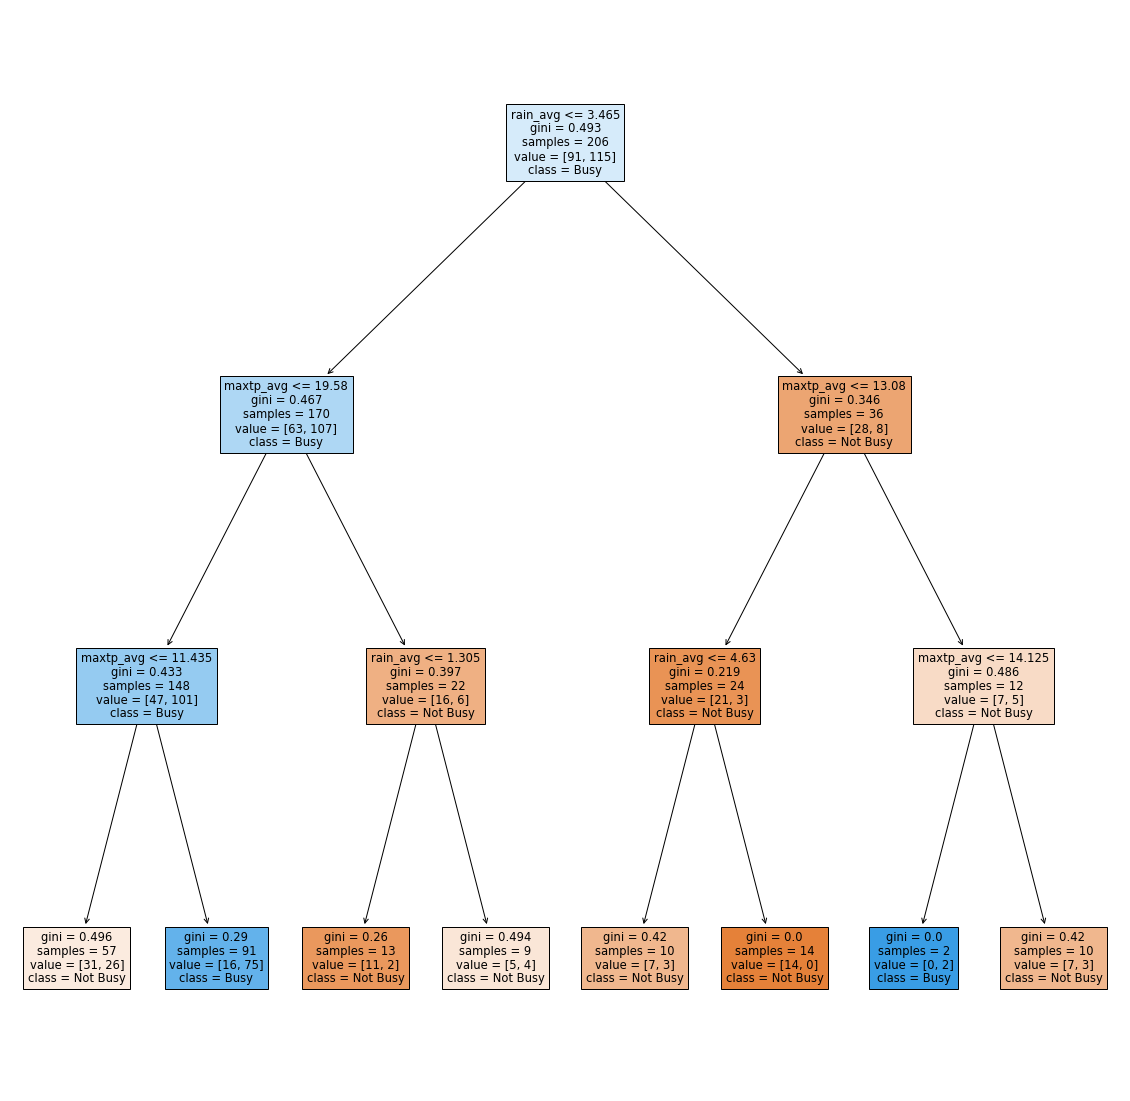

In [185]:
################################ Check out for confusion matric and viz ###############
## https://www.kaggle.com/code/arunmohan003/pruning-decision-trees-tutorial 
# Note: class_names : list of strings, bool or None, optional (default=None)
   # Names of each of the target classes in ascending numerical order.
   # Only relevant for classification and not supported for multi-output.
   # If ``True``, shows a symbolic representation of the class name.


plt.figure(figsize=(20,20))
features = X.columns
classes = ['Not Busy','Busy']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

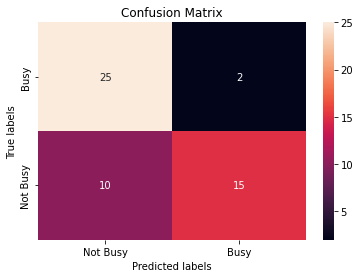

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Busy', 'Busy']); ax.yaxis.set_ticklabels(['Busy', 'Not Busy']);


## ARCHIVED CODE: 

In [162]:
# ML with Mosh example
 
# import pandas as pd
# from sklearn.tree import DecisionTreeClassifier
# # from sklearn.externals import joblib # this is what Most said, but it dosn't work and Google said to use below instead. 
# import joblib
# from sklearn import tree


# # import data
# music_data = pd.read_csv('music.csv') 
# X = music_data.drop(columns = ['genre'])
# y = music_data['genre']

# # #Create a model 
# model = DecisionTreeClassifier()

# # Train the model
# model.fit(X,y)

# tree.export_graphviz(model, out_file ='music.recommender.dot', 
#                      feature_names=['age', 'gender'],
#                      class_names=sorted(y.unique()),
#                      label='all',
#                      rounded = True, 
#                      filled =True)

# ## To visualise this. 
# # 1. Open VSCode (another application) and 
# # 2. Drop in the new file 'music.recommender.dot', 
# # 3. in VSCode, go to extentions and search for dot, install the dot extention from Stehpen. 
# # 4. On the top of the VS code windw is an ico with 3 dots (like more ...) click this, then click, 'open preview to the slide'
# # This will open up the visulisation of the decision tree. The more column you have, the more complicated it is. 

In [163]:
# Vis # From Mosh, but I can't get it work
# ## To visualise this. 
# # 1. Open VSCode (another application) and 
# # 2. Drop in the new file 'music.recommender.dot', 
# # 3. in VSCode, go to extentions and search for dot, install the dot extention from Stehpen. 
# # 4. On the top of the VS code windw is an ico with 3 dots (like more ...) click this, then click, 'open preview to the slide'
# # This will open up the visulisation of the decision tree. The more column you have, the more complicated it is. 

# tree.export_graphviz(model, out_file ='capelSt.busy.dot', 
#                      feature_names=['maxtp', 'rain'],
#                      class_names=sorted(y.unique()),
#                      label='all',
#                      rounded = True, 
#                      filled =True)

# ## To visualise this. 
# # 1. Open VSCode (another application) and 
# # 2. Drop in the new file 'music.recommender.dot', 
# # 3. in VSCode, go to extentions and search for dot, install the dot extention from Stehpen. 
# # 4. On the top of the VS code windw is an ico with 3 dots (like more ...) click this, then click, 'open preview to the slide'
# # This will open up the visulisation of the decision tree. The more column you have, the more complicated it is. 

In [164]:
# from sklearn.externals.six import StringIO  

# from six import StringIO
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()




# # export_graphviz(clf, out_file=dot_data,  
# #                 filled=True, rounded=True,
# #                 special_characters=True, feature_names = feature_cols,class_names=['0','1'])
# # graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# # graph.write_png('diabetes.png')
# # Image(graph.create_png())


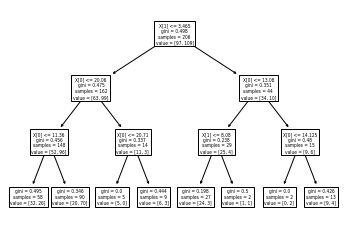

In [165]:
tree.plot_tree(model);

In [166]:
## https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec

In [167]:
print(X)

     maxtp_avg  rain_avg
0        11.17      1.89
1         6.40      1.46
2         6.87      0.74
3         6.19      1.23
4         5.24      0.00
..         ...       ...
253       9.06      3.51
254      10.21      1.71
255       7.64      2.26
256       7.44      3.06
257      11.00      1.25

[258 rows x 2 columns]


In [168]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
253    0
254    0
255    0
256    1
257    0
Name: Is_busy, Length: 258, dtype: int64


In [183]:
# y_pred = classifier.predict(X_test)
# #Accuracy
# from sklearn import metrics 
# print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

In [169]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(193, 2)
(65, 2)


In [170]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth = 3)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

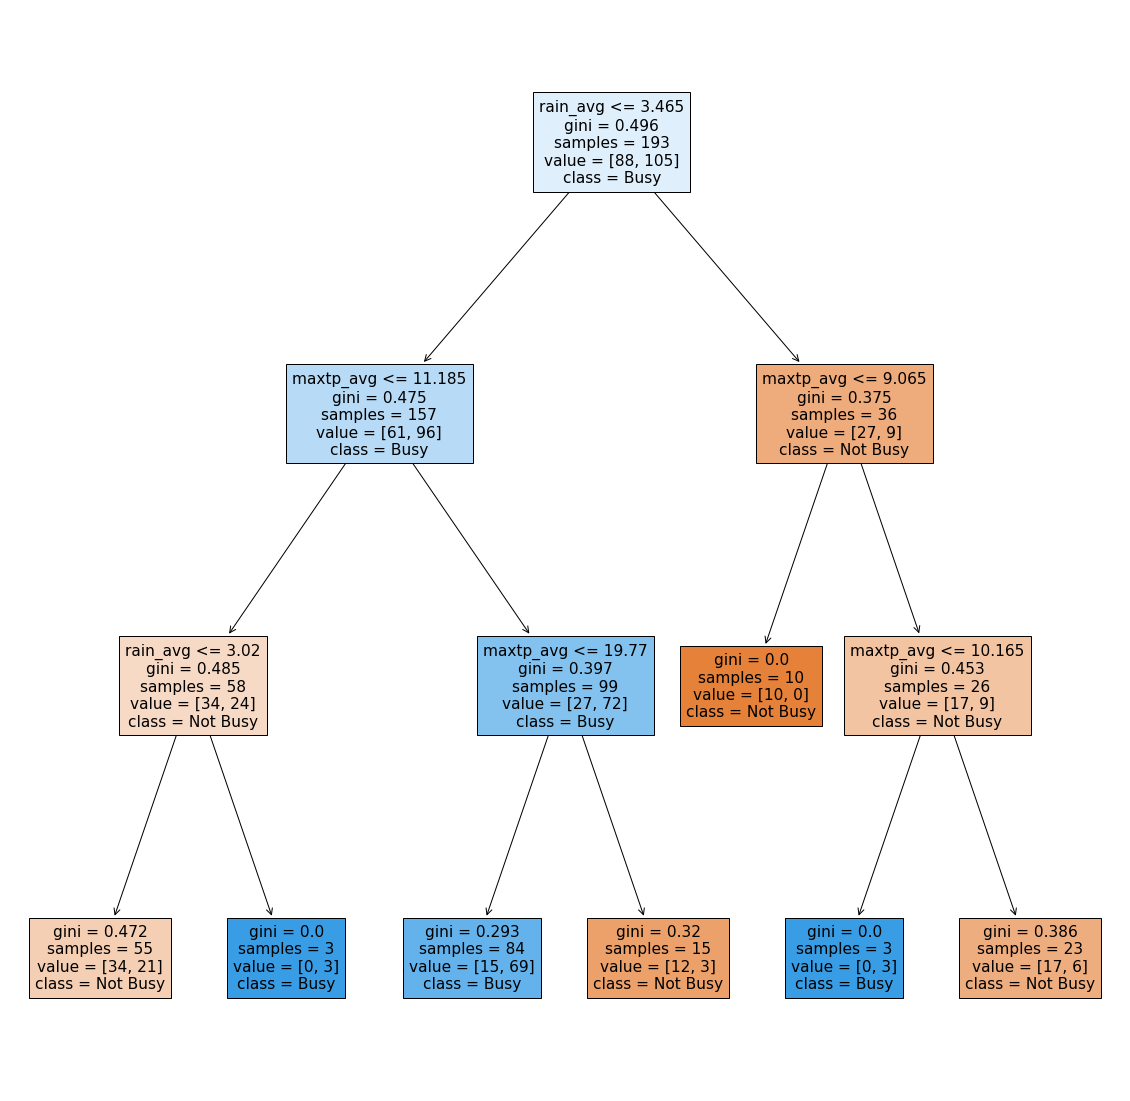

In [171]:
################################ Check out for confusion matric and viz ###############
## https://www.kaggle.com/code/arunmohan003/pruning-decision-trees-tutorial 
# Note: class_names : list of strings, bool or None, optional (default=None)
   # Names of each of the target classes in ascending numerical order.
   # Only relevant for classification and not supported for multi-output.
   # If ``True``, shows a symbolic representation of the class name.


plt.figure(figsize=(20,20))
features = X.columns
classes = ['Not Busy','Busy']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [172]:
# from keras.models import load_model

classifier = model

In [186]:
y_pred = classifier.predict(X_test)
#Accuracy
from sklearn import metrics 
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.7692307692307693


In [187]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)


In [188]:
# #importing accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

In [189]:
# cm_list=cm.tolist()
# cm_list[0].insert(0,'Real True')
# cm_list[1].insert(0,'Real False')
# print tabulate(cm_list,headers=['Real/Pred','Pred True', 'Pred False'])

In [190]:
# print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
# print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
# print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))



In [191]:
# print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
# print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
# print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))


In [192]:

# print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
# print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
# print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

In [193]:
# from sklearn.metrics import classification_report
# print('\nClassification Report\n')
# print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))

In [194]:
# # Combined for outputs
# print("Confusion Maxtrix")
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# #importing accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

# print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
# print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
# print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

# print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
# print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
# print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

# print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
# print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
# print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

# from sklearn.metrics import classification_report
# print('\nClassification Report\n')
# print(classification_report(y_test, y_pred, target_names=['Not Busy', 'Busy']))


In [ ]:
# # helper function
# def plot_confusionmatrix(y_train_pred,y_train,dom):
#     print(f'{dom} Confusion matrix')
#     cf = confusion_matrix(y_train_pred,y_train)
#     sns.heatmap(cf,annot=True,yticklabels=classes
#                ,xticklabels=classes,cmap='Blues', fmt='g')
#     plt.tight_layout()
#     plt.show()

In [ ]:
# print(f'Train score {accuracy_score(y_train_pred,y_train)}')
# print(f'Test score {accuracy_score(y_test_pred,y_test)}')
# plot_confusionmatrix(y_train_pred,y_train,dom='Train')
# plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [ ]:
#from sklearn.metrics import mean_squared_error, r2_score
#model_train_mse = mean_squared_error(y_train, y_model_train_pred)
#model_train_r2 = r2_score(y_train, y_model_train_pred)
#model_test_mse = mean_squared_error(y_test, y_model_test_pred)
##model_test_r2 = r2_score(y_test, y_model_test_pred)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Busy', 'Busy']); ax.yaxis.set_ticklabels(['Busy', 'Not Busy']);


In [ ]:
from sklearn.metrics import confusion_matrix

labels = ['business', 'health']
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris
# from sklearn.datasets import load_breast_cancer
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# from sklearn import tree

In [ ]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())


In [ ]:
# fn=['maxtp','rain']
# cn=['1', '0']fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)tree.plot_tree(model,
#                feature_names = fn, 
#                class_names=cn,
#                filled = True);fig.savefig('capelst.png')

In [ ]:
# tree.export_graphviz(model,
#                      out_file="tree.dot",
#                      feature_names = X
#                      class_names= y,
#                      filled = True)

# Try wtih max depth (i.e. Pruning)

In [ ]:

  #  https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f

In [135]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

ValueError: Number of labels=193 does not match number of samples=206

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

In [134]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

NameError: name 'y_pred_en' is not defined

In [ ]:
# as belfore with pruning

In [ ]:
#Descion tree: ass DecisionTreeClassifier as earlier. 
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X,y)



In [ ]:

# # This time add the train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:

# # note for above, the test size is 20%, i.e.e 80% is for training the model. If you decrease the amount of data for training 
# # (i.e.e increase test_size to say, 0.8, the accuracy figure gets a lot worse.)
#






In [ ]:

# # this is asking is it busier than usual for [maxtp, rain]
# Outputs = is businer than usual, 1 = True, busier than usual. If 0, = False, not busier than usual. 
predictions = model.predict( [ [12,0] ] ) 
print(predictions)


In [ ]:

#

# model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

score = accuracy_score(y_test, predictions)
score


In [ ]:

#
# Model persistance. You want to save the model to run with more data in future. 
# You don;t have to retrain model. It's already trained - like an intelligent person. 
# the below will save the model as 'music-recommender.joblib'
joblib.dump(model, 'CapelSt_busy.joblib')


In [ ]:

# Mosh goes back and changes the above to 
model = joblib.load('CapelSt_busy.joblib')


In [ ]:

# # Let's see if the model is behaving correctly 
predictions = model.predict([[25,1]])
predictions

#

In [ ]:


tree.plot_tree(model);

#

In [ ]:
print(y)

In [ ]:


################################ Check out for confusion matric and viz ###############
## https://www.kaggle.com/code/arunmohan003/pruning-decision-trees-tutorial 
# Note: class_names : list of strings, bool or None, optional (default=None)
   # Names of each of the target classes in ascending numerical order.
   # Only relevant for classification and not supported for multi-output.
   # If ``True``, shows a symbolic representation of the class name.

plt.figure(figsize=(20,20))
features = df_farm_eu.columns
classes = ['Not Busy','Busy']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

### Part 2: Machine Learning 2 

# Based on: # Based on: https://www.datacamp.com/tutorial/tutorial-time-series-forecasting 

In [ ]:
# sample  

## extract month and year from dates
# df_farm_eu2 = df_farm_eu['Month'] = [i.month for i in df_farm_eu['Date']]
# df_farm_eu2 = df_farm_eu['Year'] = [i.year for i in df_farm_eu['Date']]

# # create a sequence of numbers
# data['Series'] = np.arange(1,len(data)+1)

# # drop unnecessary columns and re-arrange
# data.drop(['Date', 'MA12'], axis=1, inplace=True)
# data = data[['Series', 'Year', 'Month', 'Passengers']]

# # check the head of the dataset
# data.head()

In [ ]:
df_farm_eu.describe()

In [ ]:

# # extract month and year from dates
# df_farm_eu['Month'] = [i.month for i in df_farm_eu['Date']]
# df_farm_eu['Year'] = [i.year for i in df_farm_eu['Date']]

# # # create a sequence of numbers
# df_farm_eu['Series'] = np.arange(1,len(df_farm_eu)+1)

# # # drop unnecessary columns and re-arrange
# df_farm_eu.drop(['Date', 'Capel_Street_avg','Is_busier_than_usual','Date', 'IN', 'OUT'], axis=1, inplace=True)
# df_farm_eu_trimmed = df_farm_eu[['Series', 'Capel_Street_avg', 'Year', 'Month', 'maxtp', 'mintp', 'rain', 'wdsp', 'sun']]

# # # check the head of the dataset
# df_farm_eu_trimmed.head()


In [ ]:
# # install pycaret
# # pip install pycaret

# pip install


In [ ]:
import warnings

import numpy as np
import pandas as pd

# hide warnings
warnings.filterwarnings("ignore")

In [ ]:
# from sktime.datasets import load_airline
# from sktime.utils.plotting import plot_series

In [ ]:


# # plotting for visualization
# plot_series(y)


## New approach: https://www.kaggle.com/code/tuannguyenvananh/traffic-prediction-and-some-analysis/notebook 

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [ ]:


# Don't need this as I alreay have my data frame
# df = pd.read_csv('../input/traffic-prediction-dataset/traffic.csv', parse_dates=True, index_col='DateTime')

df_farm_eu2 = pd.read_csv('df_farm_eu2.csv', parse_dates=True, index_col='Date') 

df_farm_eu2.head()



In [ ]:
df_farm_eu2.describe

In [ ]:
df_farm_eu2.info()

In [ ]:
### did all this manually 

# extract year from date
# df_farm_eu2['year'] = pd.Series(df_farm_eu.index).apply(lambda x: x.year).to_list()

# # extract month from date
# df_farm_eu['month'] = pd.Series(df.index).apply(lambda x: x.month).to_list()

# # extract day from date
# df_farm_eu['day_of_month'] = pd.Series(df.index).apply(lambda x: x.day).to_list()

# # extract hour from date
# df_farm_eu['Hour'] = pd.Series(df.index).apply(lambda x: x.hour).to_list()



In [ ]:
# example code

# def make_hist(junction=1):
#     data = df[df['Junction'] == junction]
#     f, ax = plt.subplots(figsize=(17, 5))
#     ax = sns.histplot(data['Vehicles'], kde=True, stat='probability')
#     ax.set_title(f'Plot show the distribution of data in junction {junction}')
#     ax.grid(True, ls='-.', alpha=0.75)
#     plt.show()



In [ ]:


def make_hist()
    data = df_farm_eu2[df_farm_eu2['Capel_Street_avg'] == Capel_Street_avg]
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.histplot(data['Capel_Street_avg'], kde=True, stat='probability')
    ax.set_title(f'Plot show the distribution of data in Capel_Street_avg {Capel_Street_avg}')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()



In [ ]:
make_hist(1)

In [ ]:
import pandas as pd

# Histogram 
# Source: https://realpython.com/python-histograms/ 
## Maybe make a function of this. Maybe see above code? 

df_farm_eu2.Capel_Street_avg.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Capel Street Daily Footfall')
plt.xlabel('Counts')
plt.ylabel('Capel Street Footfall')
plt.grid(axis='y', alpha=0.75)


In [ ]:
df_farm_eu2.maxtp.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('maxtp')
plt.xlabel('Counts')
plt.ylabel('maxtp')
plt.grid(axis='y', alpha=0.75)

In [ ]:
### Rain is skewed. Can't get negative rainfall. Does that matter? 

df_farm_eu2.rain.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('rain')
plt.xlabel('Counts')
plt.ylabel('rain')
plt.grid(axis='y', alpha=0.75)

In [ ]:
df_farm_eu2.head()

In [ ]:
## Sample code

# def make_time_series_plot(junction=1):
#     f, ax = plt.subplots(figsize=(17, 5))
#     data=df[df.Junction == junction]
#     ax = sns.lineplot(data=data, y='Vehicles', x='DateTime', ax=ax)
#     start = data.head(1)
#     end = data.tail(1)
#     ax.set_title(f'Plot show amounts of Vehicles in junction {junction} from {start.Month[0]}-{start.Year[0]} to {end.Month[0]}-{end.Year[0]}', fontsize=15)
#     ax.grid(True, ls='-.', alpha=0.75)
#     plt.show()

df_farm_eu.head()

## Sample code

def make_time_series_plot():
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.lineplot(data=df_farm_eu, y='Capel_Street_avg', x='Date', ax=ax)
    start = df_farm_eu.head(1)
    end = df_farm_eu.tail(1)
    ax.set_title(f'Capel Street Footfall from {start.month[0]}-{start.year[0]} to {end.month[0]}-{end.year[0]}', fontsize=15)
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()



In [ ]:
make_time_series_plot()

In [ ]:


standardization = lambda x: StandardScaler().fit_transform(x)

In [ ]:

z_df_farm_eu2 = df_farm_eu2.copy()
z_df_farm_eu2['Capel_Street_avg'] = standardization(z_df_farm_eu2.Capel_Street_avg.values.reshape(-1, 1))
z_df_farm_eu2.head()



In [ ]:
## Add is capel street as dummy variable 
# del df_farm_eu2['Is_Capel_Street_avg']
df_farm_eu2['Is_Capel_Street_avg']=1
df_farm_eu2.head()

In [ ]:
# Sample code 
# f, axis = plt.subplots(3, 4, figsize=(20, 10))

# for i, year in enumerate(range(2015, 2018)):
#   for j, junction in enumerate(range(1, 5)):
#     sns.histplot(z_df[(z_df.Junction == junction) & (z_df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
#     axis[i, j].grid(True, alpha=0.75, ls='-.')
    
# plt.xlabel('Year')
# plt.ylabel('Junction')
# f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction when data transfrom to Z Score', fontsize=20)
# plt.show()

In [ ]:
# Sample code 

## Junction = (nothing) or Is_Capel_Street_avg 
## vechiles = Capel_St

# f, axis = plt.subplots(3, 4, figsize=(20, 10))

# for i, year in enumerate(range(2015, 2018)):
#   for j, junction in enumerate(range(1, 5)):
#     sns.histplot(z_df[(z_df.Junction == junction) & (z_df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
#     axis[i, j].grid(True, alpha=0.75, ls='-.')
    
# plt.xlabel('Year')
# plt.ylabel('Junction')
# f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction when data transfrom to Z Score', fontsize=20)
# plt.show()



In [ ]:


# Boxplot for Vehicles

#     In boxplot, we can see a lot of outliers (those which is the dot)

# f, axis = plt.subplots(3, 4, figsize=(20, 10))

# for i, year in zip(range(3), range(2015, 2018)):
#   for j, junction in zip(range(4), range(1, 5)):
#     sns.boxplot(x=df[(df.Junction == junction) & (df.Year == year)]['Vehicles'], ax=axis[i, j])
#     axis[i, j].grid(True, alpha=0.75, ls='-.')

# plt.xlabel('Year')
# plt.ylabel('Junction')
# f.suptitle('Boxplot showing the range of amounts Vehicles by Year and by Junction', fontsize=20)
# plt.show()



In [ ]:


f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in zip(range(3), range(2015, 2018)):
  for i, is_Capel_Street_avg in zip(range(4), range(1, 5)):
    sns.boxplot(x=df_farm_eu2[(df_farm_eu2.Is_caple_street == is_Capel_Street_avg & (df_farm_eu2.year == year)]['Capel_Street_avg'], ax=axis[i, j])
    axis[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Capel Street')
f.suptitle('Boxplot showing the range of amounts Footfall on Capel Street by Year', fontsize=20)
plt.show()



In [ ]:


# f, axis = plt.subplots(3, 4, figsize=(20, 10))

# #for i, year in zip(range(3), range(2015, 2018)):
#  # for i, junction in zip(range(4), range(1, 5)):
# sns.boxplot(x=df_farm_eu2[(df_farm_eu2.year == year)]['Capel_Street_avg'], ax=axis[i, j])
# axis[i, j].grid(True, alpha=0.75, ls='-.')

# plt.xlabel('Year')
# plt.ylabel('Capel Street')
# f.suptitle('Boxplot showing the range of amounts Footfall in Capel Street', fontsize=20)
# plt.show()

In [ ]:
### https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_farm_eu2.Capel_Street_avg)
 
# show plot
plt.show()



In [ ]:
### https://www.geeksforgeeks.org/regression-classification-supervised-machine-learning/?ref=gcse

# # Python code to illustrate
# # regression using data set
# import matplotlib
# matplotlib.use('GTKAgg')

# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import datasets, linear_model
# import pandas as pd

# # Load CSV and columns
# df = pd.read_csv("Housing.csv")

# Y = df['price']
# X = df['lotsize']

# X=X.values.reshape(len(X),1)
# Y=Y.values.reshape(len(Y),1)

# # Split the data into training/testing sets
# X_train = X[:-250]
# X_test = X[-250:]

# # Split the targets into training/testing sets
# Y_train = Y[:-250]
# Y_test = Y[-250:]

# # Plot outputs
# plt.scatter(X_test, Y_test, color='black')
# plt.title('Test Data')
# plt.xlabel('Size')
# plt.ylabel('Price')
# plt.xticks(())
# plt.yticks(())


# # Create linear regression object
# regr = linear_model.LinearRegression()

# # Train the model using the training sets
# regr.fit(X_train, Y_train)

# # Plot outputs
# plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)
# plt.show()


In [ ]:
### https://www.geeksforgeeks.org/regression-classification-supervised-machine-learning/?ref=gcse

# Python code to illustrate
# regression using data set
import matplotlib


################################################# Can't get these to work. Ignoring and hoping for best. 
# import pycairo
# import cairocffiis 
# matplotlib.use('GTK3Cairo')



import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

# # Load CSV and columns
# df = pd.read_csv("Housing.csv")


# y_maxtp = df_farm_eu['Capel_Street_avg']

# #  y = dependant variable 
# Y_Capel_Street_avg = df_farm_eu2['Capel_Street_avg']

# # x = explainatory variables 
# X_maxtp = df_farm_eu['maxtp']
# X_rain = df_farm_eu['rain']


# # Y = df['price']
# # X = df['lotsize']

# # X=X.values.reshape(len(X),1)
# # y=y.values.reshape(len(y),1)

# # # # Split the data into training/testing sets
# # X_train = X[:-250]
# # X_test = X[-250:]

# # # # Split the targets into training/testing sets
# # y_train = y[:-250]
# # y_test = y[-250:]

# # # # Plot outputs
# # plt.scatter(X_test, y_test, color='black')
# # plt.title('Test Data')
# # plt.xlabel('Date')
# # plt.ylabel('Footfall')
# # plt.xticks(())
# # plt.yticks(())


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Plot outputs
# plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)
# plt.show()

plt.plot(X_test, regr.predict(X_test))
plt.show()


In [ ]:
print(Y_Capel_Street_avg)

In [ ]:
print(X_maxtp)

In [ ]:
print(X_rain)

In [53]:



# X=X.values.reshape(len(X),1)
# y=y.values.reshape(len(y),1)

# # Split the data into training/testing sets
# First rain 

X_rain_train = X[0.8]
X_rain_test = X[0.2]

# # Split the targets into training/testing sets
y_Capel_Street_avg_train = y[0.8]
y_Capel_Street_avg_test = y[0.2]

# # Plot outputs
plt.scatter(X_rain_test, y_Capel_Street_avg_test, color='black')
plt.title('Rain Data')
plt.xlabel('Date')
plt.ylabel('Footfall')
plt.xticks(())
plt.yticks(())


# # Create linear regression object
# regr = linear_model.LinearRegression()

# # Train the model using the training sets
# regr.fit(X_train, Y_train)

# # Plot outputs
# plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)
# plt.show()


KeyError: 0.8

In [ ]:
12*.8

##https://www.datacamp.com/tutorial/tutorial-time-series-forecasting 

In [ ]:


# split data into train-test set
train = df_farm_eu2[df_farm_eu2['month'] < 9]
test = df_farm_eu2[df_farm_eu2['month'] >= 9]

# # check shape
train.shape, test.shape


In [ ]:
# install pycaret
!pip install --pre pycaret


In [ ]:
pip install orbit-ml

In [ ]:
pip install pycaret[full]